# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

In [3]:
pip install newsapi

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("news_api")





In [5]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)



In [7]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)





In [8]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
# voice crisis
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()


,date,text,compound,positive,negative,neutral
0,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.000,0.961
1,2021-03-24,"As it promised earlier this year, Tesla now ac...",0.5859,0.127,0.000,0.873
2,2021-03-24,The inevitable has happened: You can now purch...,0.3182,0.065,0.000,0.935
3,2021-03-24,Tesla made headlines earlier this year when it...,0.2023,0.050,0.000,0.950
4,2021-03-31,National Burrito Day lands on April Fools Day ...,0.6075,0.178,0.102,0.719


In [10]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!

ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-31,Whether youre looking to make a larger investm...,0.0772,0.039,0.000,0.961
2,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
3,2021-03-29,Payment card network Visa has announced that t...,0.0000,0.000,0.000,1.000
4,2021-03-30,The NFT craze has been an intriguing moment fo...,0.5650,0.172,0.093,0.735


In [11]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.136247,0.05781,0.024450,0.917740
std,0.358485,0.06870,0.045635,0.082625
min,-0.757900,0.00000,0.000000,0.660000
25%,0.000000,0.00000,0.000000,0.865000
50%,0.000000,0.04350,0.000000,0.932500
75%,0.366350,0.09000,0.039000,1.000000
max,0.908000,0.34000,0.198000,1.000000


In [12]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.150301,0.068350,0.027800,0.903870
std,0.400586,0.075322,0.044404,0.084013
min,-0.659700,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.846750
50%,0.038700,0.052000,0.000000,0.917500
75%,0.475725,0.112500,0.061000,1.000000
max,0.885800,0.273000,0.166000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum.

Q: Which coin had the highest compound score?

A: Ethereum had the higher mean compund score. Bitcoin had the higher max compound score.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest max positive score. 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\matth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [15]:
corpus_bitcoin = list(bitcoin_df["text"]) 

corpus_ethereum = list(ethereum_df["text"])

In [16]:
# # Complete the tokenizer function
# def tokenizer(text):
#     """Tokenizes text."""
    
#     # Create a list of the words

#     # Convert the words to lowercase
    
#     # Remove the punctuation
    
#     # Remove the stop words
    
#     # Lemmatize Words into root words
    
#     return tokens

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output


In [36]:
# Create a new tokens column for bitcoin
# YOUR CODE HERE!

big_string_bit = ' '.join(corpus_bitcoin)
input_words_bit = process_text(big_string_bit)

In [37]:
# Create a new tokens column for ethereum
# YOUR CODE HERE!

big_string_eth = ' '.join(corpus_ethereum)
input_words_eth = process_text(big_string_eth)


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

bigram_counts_bit = Counter(ngrams(input_words_bit, n=2))

In [24]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!


big_string_eth = Counter(ngrams(input_words_eth, n=2))

In [25]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(corpus):
        # Combine all articles in corpus into one large string
    big_string = corpus
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [26]:
# Get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(big_string_bit)

,word,count
0,char,98
1,bitcoin,63
2,reuters,45
3,ha,29
4,march,18
5,new,16
6,tesla,15
7,said,15
8,cryptocurrency,14
9,photo,14


In [29]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(big_string_eth)

,word,count
0,char,98
1,cryptocurrency,28
2,digital,23
3,bitcoin,21
4,nft,20
5,ha,18
6,new,16
7,token,15
8,ethereum,14
9,nonfungible,14


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

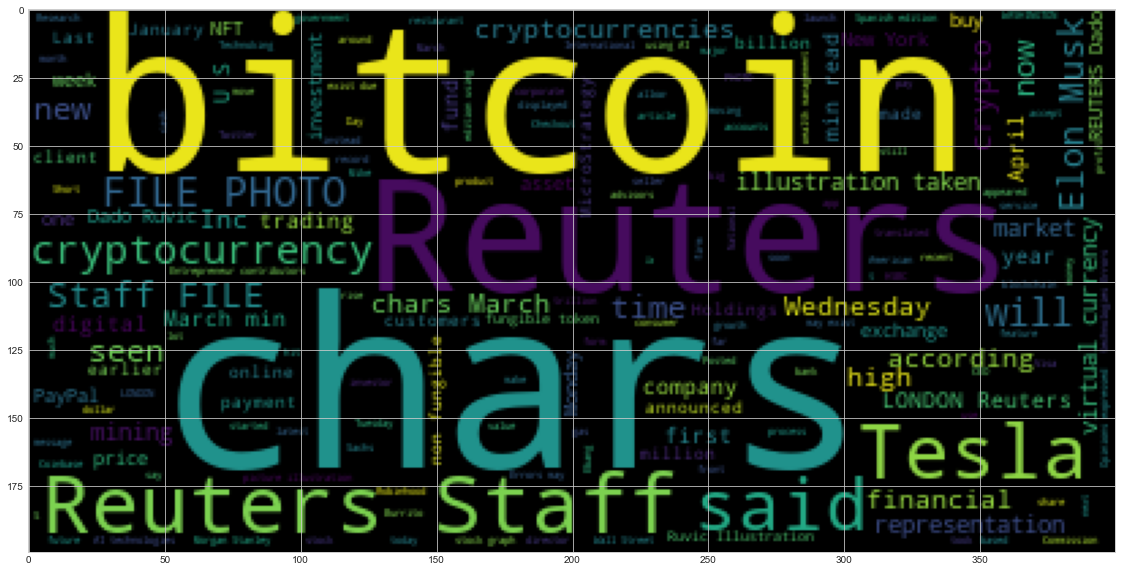

In [45]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud()
img = wc.generate(big_string_bit)
plt.imshow(img)

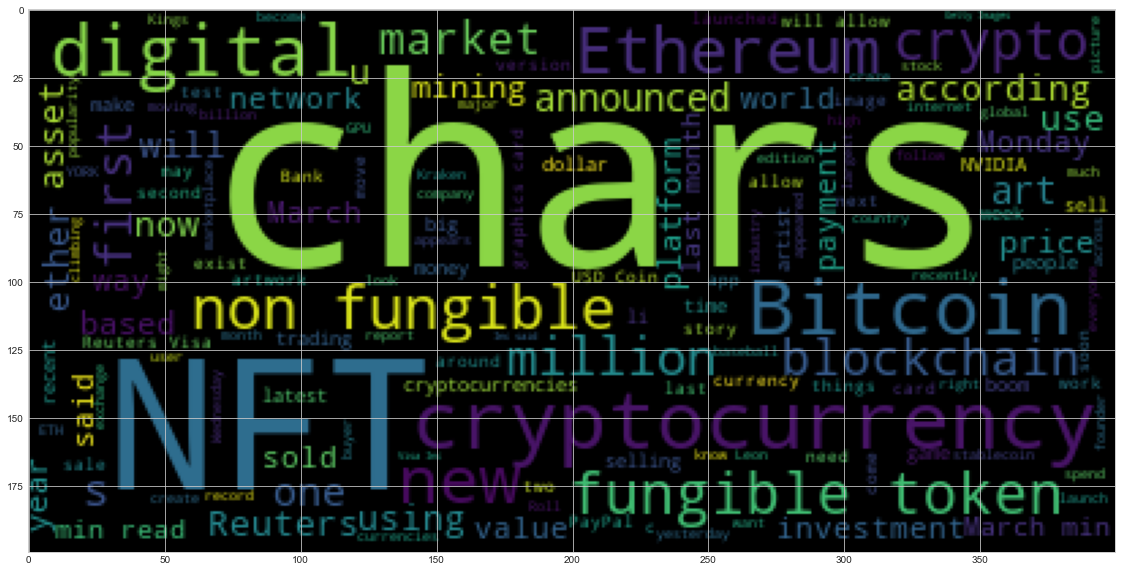

In [44]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!


wc = WordCloud()
img = wc.generate(big_string_eth)
plt.imshow(img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [46]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [50]:
# Concatenate all of the bitcoin text together
# YOUR CODE HERE!
big_string_bit


In [52]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(big_string_bit)

# Add a title to the document
# YOUR CODE HERE!

In [53]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')

In [55]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in doc.ents if ent.label_ == 'ORG'])

['Bitcoin, Ethereum', 'Tesla', 'Tesla', 'Tesla', 'Tesla', 'SEC', 'Reuters', 'Reuters', 'Robinhood', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'NFT', 'TokenWave', 'AI', 'FD Funds Management LLC', 'Reuters', 'Reuters', 'the Wall Street Journal', 'the Commodity Futures Trading Commission', 'Coinbase', 'Reuters', 'Reuters', 'Entrepreneur', 'New White House Communications', 'Jonathan Ernst', 'NFT', 'Ethereum', 'Coinbase', 'Apple', 'Reuters', 'Reuters', 'Benoit Tessier/File Photo\r\n', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Hindenburg Research', 'Ebang International Holdings Inc.', 'Reuters', 'Reuters', 'Reuters', 'Morgan Stanley', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'SkyBridge Capital', 'Reuters', 'Tesla Inc', 'Aly Song/File', 'Reuters', 'Benoit Tessier/Illustration/File Photo', 'Reuters', 'Reuters', 'The Swiss Financial Market Supervisory Authority', 'FINMA', 'Bitcoin Suisse AG', 'Reuters', 'Reuters', 'The Swiss Financial Market Supervisory Authority', 'FINMA', '

---

## Ethereum NER

In [ ]:
# Concatenate all of the ethereum text together
# YOUR CODE HERE!

big_string_eth

In [56]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc2 = nlp(big_string_eth)

# Add a title to the document
# YOUR CODE HERE!

In [58]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style = "ent")

In [59]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in doc2.ents if ent.label_ == 'ORG'])

['Reuters', 'Bitcoin, Ethereum', 'Christies', 'Visa', 'USD Coin', 'Ethereum', 'Crypto.com', 'NFT', 'Ethereum', 'NFT', 'Ethereum', 'Robinhood', 'AI', 'New York Times', 'NFT', 'Beeple’s', 'NFT', 'MLB', 'NFT', 'Major League Baseball', 'NFT', 'Reuters', 'Ethereum', 'Reuters', 'Apple', 'Amazon', 'iPad', 'Reuters', 'Reuters', 'Digital', 'Grayscale Investments', 'Entrepreneur', 'Reuters', 'NFT', 'Reuters', 'Visa', 'NFT', 'Ethereum', 'GeForce', 'Entrepreneur', 'Deutsche Bank', 'Nomura', 'Entrepreneur', 'NFT', 'NFT', 'The Post', 'NFT', 'NFT', 'Kraken', 'Kraken', 'NFT', 'Kraken', 'Reuters', 'NFT', 'Ethereum', 'Ethereum', 'Visa', 'CNET', 'NFT', 'Ethereum', 'NFT', 'AI', 'NFT', '3D', 'the Tampa Bay Buccaneers', 'NFT', 'Reuters', 'NFT', 'Fed', 'Reuters', 'Reuters', 'NFL', 'NFT', 'Tesla', 'Google', 'New Constructs', 'Reuters', 'SkyBridge Capital', 'NFT', 'Mirror', 'ETH', 'ETH', 'GPU', 'TVP News', 'the Hong Kong Customs', "CNN Business' Before", 'Bell', 'CNN', 'Bank of America', 'DeFi', 'GeForce', 'GP